# Guía 5 - Transformada Z

## Ejercicio 4

Considere el sistema continuo
$$
H(s) = \frac{12500s}{44s^2 + 60625s + 625 \cdot 10^4}
$$

y obtenga la función de transferencia $H(z)$ del sistema discreto correspondiente, mediante la utilización de las transformaciones conformes de Euler y Bilineal. Para ello:
1. Determine la frecuencia de corte del sistema continuo (frecuencia donde la respuesta cae 3dB respecto al valor máximo) y utilice, para aplicar las transformaciones conformes, una frecuencia de muestreo cuatro veces superior a ésta.
2. Analice la respuesta en frecuencia de los dos sistemas discretos obtenidos y compárelas con la del sistema continuo. Determine si la frecuencia de muestreo empleada permite obtener la respuesta esperada mediante ambas transformaciones conformes.

### Solución

Utilizando transformaciones conformes de Euler y Bilineal obtenemos las expresiones de las funciones de transferencia $H(z)$
- Euler: $s = \frac{1-z^{-1}}{T}$
$$
H\left( \frac{1-z^{-1}}{T} \right) = \frac{12500\left( \frac{1-z^{-1}}{T} \right)}{44\left( \frac{1-z^{-1}}{T} \right)^2 + 60625\left( \frac{1-z^{-1}}{T} \right) + 625 \cdot 10^4}
$$
- Bilineal
$$
H\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right) = \frac{12500\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right)}{44\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right)^2 + 60625\left( \frac{2}{T}\frac{1-z^{-1}}{1+z^{-1}} \right) + 625 \cdot 10^4}
$$

1. Para determinar la frecuencia de corte obtenemos la respuesta en frecuencia del sistema continuo ($H(s)$ para $s=j\omega$), obtenemos el maximo y luego la frecuencia con respuesta 3dB menor al maximo.

C:\Users\Gamemax\AppData\Local\Temp\ipykernel_21020\3016146104.py:18: RuntimeWarning: divide by zero encountered in log10
  return 20 * np.log10(np.abs(magnitude))


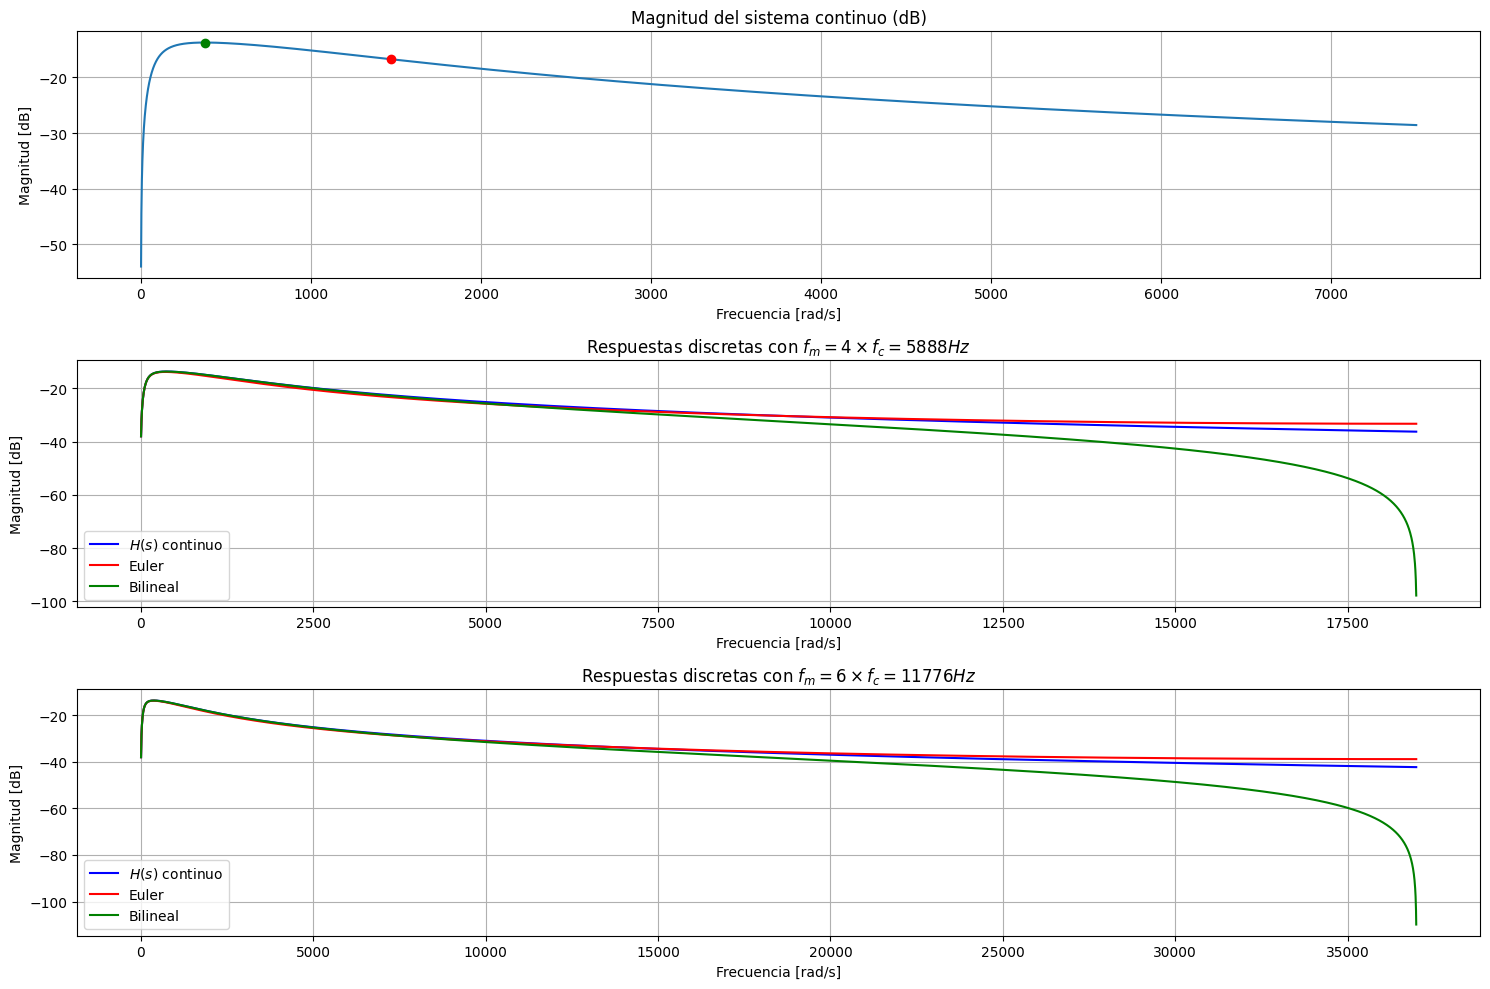

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def sEuler(T, z):
    # Transformación conforme de Euler: s ≈ (1 - z^-1) / T
    return (1 - z**-1) / T

def sBilineal(T, z):
    # Transformación bilineal: s ≈ (2/T) * (1 - z^-1) / (1 + z^-1)
    return (2 / T) * (1 - z**-1) / (1 + z**-1)

def Hs(s):
    # Función de transferencia continua H(s)
    return 12500 * s / (44 * s**2 + 60625 * s + 6250000)

def dB(magnitude):
    # Convierte magnitud a decibeles
    return 20 * np.log10(np.abs(magnitude))

# valor arbitrario para la frecuencia de muestreo   
fmtest = 15000
s = 1j * np.arange(fmtest // 2) # s = jw

H_frecuencia = np.abs(Hs(s)) # H(jw) -> respuesta en frecuencia
fMax = np.argmax(H_frecuencia) # frecuencia donde H(s) tiene máxima magnitud
maxMag = H_frecuencia[fMax]

fCorte = fMax
# encontrar la frecuencia donde la respuesta cae 3 dB respecto al máximo
while dB(H_frecuencia[fCorte]) > (dB(maxMag) - 3):
    fCorte += 1

# frecuencia de muestreo 4 veces la frecuencia de corte
fm = 4 * fCorte
T = 1 / fm
f = np.arange(fm // 2) #[0,1,...,fm/2 - 1]
omega = np.linspace(0, np.pi, len(f), endpoint=False)
# desde el plano z obtener la T. de Fourier de un sistema discreto (evaluación sobre el contorno unitario)
z = np.exp(1j * omega)
HEuler = Hs(sEuler(T, z)) # H(z) mediante transformación de Euler
HBilineal = Hs(sBilineal(T, z)) # H(z) mediante transformación bilineal

# frecuencia de muestreo más alta (6 veces fCorte) para comparar
fm2 = 8 * fCorte
T2 = 1 / fm2
f2 = np.arange(fm2 // 2)
omega2 = np.linspace(0, np.pi, len(f2), endpoint=False)
z2 = np.exp(1j * omega2)
HEuler2 = Hs(sEuler(T2, z2))
HBilineal2 = Hs(sBilineal(T2, z2))

# Graficar
# frecuencias para graficar en el eje horizontal
w = np.linspace(0, np.pi * fm, len(f), endpoint=False)
w2 = np.linspace(0, np.pi * fm2, len(f2), endpoint=False)

fig, ax = plt.subplots(3, 1, figsize=(15, 10))
for axi in ax:
    axi.grid()

# Magnitud de H(s) continua con marcas en el máximo y -3 dB
ax[0].plot(np.abs(s), dB(H_frecuencia))
ax[0].plot(fMax, dB(H_frecuencia[fMax]), 'go')
ax[0].plot(fCorte, dB(H_frecuencia[fCorte]), 'ro')
ax[0].set_title('Magnitud del sistema continuo (dB)')
ax[0].set_xlabel('Frecuencia [rad/s]')
ax[0].set_ylabel('Magnitud [dB]')

# Comparación entre sistema continuo y discretos (fm = 4 * fCorte)
ax[1].plot(w, dB(Hs(1j * w)), 'b', label='$H(s)$ continuo')
ax[1].plot(w, dB(HEuler), 'r', label='Euler')
ax[1].plot(w, dB(HBilineal), 'g', label='Bilineal')
ax[1].set_title(f'Respuestas discretas con $f_m = 4 \\times f_c = {fm} Hz$')
ax[1].set_xlabel('Frecuencia [rad/s]')
ax[1].set_ylabel('Magnitud [dB]')
ax[1].legend()

# Comparación con frecuencia de muestreo mayor (fm = 6 * fCorte)
ax[2].plot(w2, dB(Hs(1j * w2)), 'b', label='$H(s)$ continuo')
ax[2].plot(w2, dB(HEuler2), 'r', label='Euler')
ax[2].plot(w2, dB(HBilineal2), 'g', label='Bilineal')
ax[2].set_title(f'Respuestas discretas con $f_m = 6 \\times f_c = {fm2} Hz$')
ax[2].set_xlabel('Frecuencia [rad/s]')
ax[2].set_ylabel('Magnitud [dB]')
ax[2].legend()

plt.tight_layout()
plt.show()
